#Variable Types

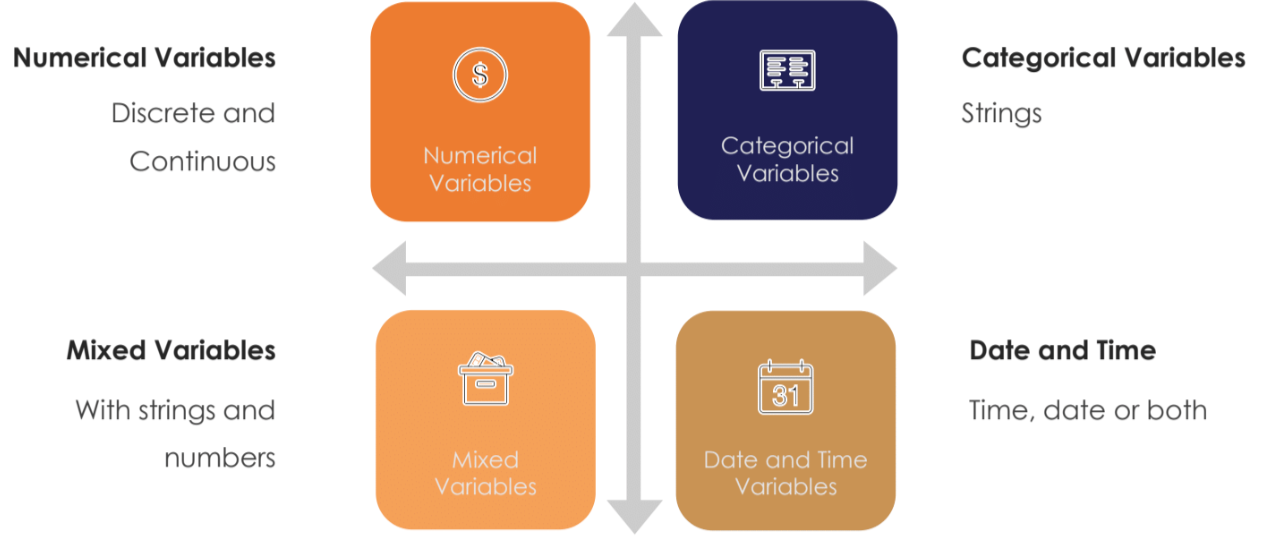

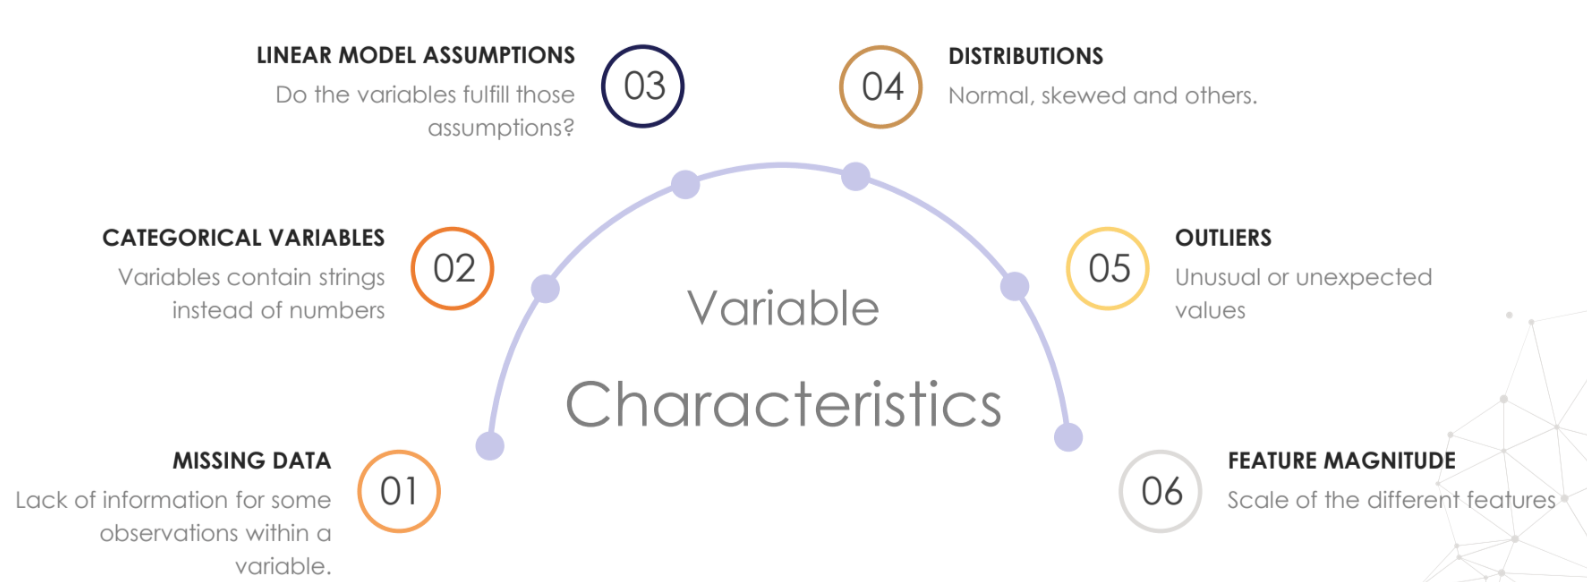

#Variable Characteristics

**Missing Data Mechanisims**

* Missing data completely at random
* Missing data at random
* Missing data not at random

**Cardinality**

* High cardinality may cause overfitting and operational problems.
* Eg. would be when we split our dataset to train and test. Some labels may only appear in the train set - overfitting
Some on the test set, making the model unable to interpret the values

**Rare Labels**

*In some cases, grouping rare labels could provide some good information*

* Rare labels are hard to interpret
* Removing rare labels may improve model performance

**Outliers**

* Linear models and AdaBoost are susceptible to outliers
* interquartile proximity rule - any data point in a boxplot that's more than 1.5 IQR points below the first quartile data or more than 1.5 IQR points above the third quartile data is considered an outlier
Linear Model Assumptions

**Linear Model Assumptions**

*We follow these assumptions in linear modeling to ensure that the model we build is reliable, interpretable, and makes accurate predictions.*
* Linearity: The relationship between the input variables and the output is a straight line. If you plot them, they should form a line, not a curve.

* Normally Distributed Errors: The differences between the predicted and actual values should form a bell-shaped curve (normal distribution), meaning most errors are small, with fewer large errors.

* Homoscedasticity: The spread of the errors should be the same no matter the value of the input. Errors should look evenly spread out, not getting wider or narrower at different points.

* Multicollinearity: The input variables should not be too similar or closely related to each other. If they are, the model will struggle to determine each variable’s effect on the output.

**Variable magnitudes**
* The regression coefficient is directly influenced by the scale of the
variable

* Variables with bigger magnitude / value range dominate over the ones
with smaller magnitude / value
range

* Gradient descent converges faster when features are on similar
scales

* Feature scaling helps decrease the time to find support vectors for
SVMs

* Euclidean distances are sensitive to feature magnitude.

#Data Imputation (Theory)

**Data imputation Methods**

*There are two methods*

**Statistics**

*If we use the statistic approach, we add a a binary variable to flag that missing observations*
* Mean and Median for numerical variables - if the variable is normally distributed, add mean, else if skewed, add median.
* Mode for categorical variables
* Assumptions - data is missing at random
* **Missing indicators** - We create a column of binary values to indicate which variables have been imputed and which ones did not using 0 and 1 - commonly used practice
* Side note: It expands feature space and many missing indicators may end up being very highly correlated

**Arbitrary**

*often refer to approaches where you manually decide how to fill in missing values based on your judgment or specific rules.*

* Arbitrary string for caterogical variables - it is commonly used to add the word "Missing". Suitable for categorical variables
* Arbitrary number for numerical variables
* Assumptions - data is not missing at random
* Ranges - 0, 999, -999
* How to determine the range? Find the variable value range and pick the values outside of that range

**Train/Test Note**
* Do data imputation after splitting the dataset

**Imputing Considerations - Statistics**
* Missing Values: When a large number of values are missing, the variance is calculated only on the non-missing data. This reflects the natural spread of those available values.
* Reduction in Variance: By filling in missing values with a single value (mean or median), you reduce the overall variability in the data. The added identical values reduce the spread of the data around the mean, leading to a lower variance.
* Impact on Outliers: Extensive imputation can alter the distribution of the data, potentially creating new outliers or reducing the impact of existing ones.
* **Covariance Changes**: When you fill in missing data, it can change how different variables relate to each other. For example, if two variables usually move together in a certain way, imputation might alter that relationship. This is because imputing values (like using the mean or median) can reduce the natural differences between variables or shift the data in ways that change how they interact. As a result, any analysis that depends on these relationships might be affected.

**Imputing Considerations - Arbitrary**
* Imputing with arbitrary values increases the standard deviation by a lot.
* It also masks outliers

**Mode imputation Considerations**
* May lead to an over-representation of the most frequent labels
* More missing values means greater distortions

#Data Imputation Using Pandas

**Data inputation using Pandas**

**Split the data first**
* X_train, X_test, y_train, y_test = train_test_split(
  input features,
  target features,
  test_size = 0.3
  random_state = 42)

* X_train.isnull.mean() - find the missing data
* var_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0] - Capture the variables to impute in a list

##Imputation template for every given method

In [ ]:
# Step 1: Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    input_features,  # Features for training
    target_features, # Target values
    test_size=0.3,   # Proportion of the dataset to include in the test split
    random_state=42  # Seed for reproducibility
)

# Display the shapes of the training and test sets
X_train.shape, X_test.shape

# Step 2: Identify missing data in the training set
# Find the number of missing values in each column
X_train.isnull().mean()

# Step 3: Capture the columns with missing values in a list
columns_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

# Step 4: Show the distribution of the variables in the training set
# Use histograms to visualize the distribution and decide on the imputation method (e.g., mean/median)
X_train.hist(bin=50, figsize=(10, 5))
plt.show()

## 1) Mean/Median Imputation

In [ ]:
# Step 1: Decide on the imputation method by calculating the median for the specified columns and store these in a dictionary
imputation_dict = X_train[columns_to_impute].median().to_dict()

# Step 2: Combine the imputation strategy and replace missing data in the training and test sets using the median values
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

# Step 3: Check for any remaining null values in the training set
X_train.isnull().sum()

## 2) Arbitrary Value Imputation

In [ ]:
# Step 1: Examine the minimum and maximum values of the columns to be imputed
X_train[columns_to_impute].agg(["min", "max"])

# Step 2: Decide on the imputation values for the specified columns and store them in a dictionary
imputation_dict = {
    "column_one": 999,
    "column_two": 1999,
    "column_three": 2999
}

imputation_dict

# Step 3: Combine the imputation strategy and replace missing data in the training and test sets
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

# Step 4: Check for any remaining null values in the training set
X_train.isnull().sum()

## 3) Missing Category Imputation

In [ ]:
# Step 1: Decide the imputation method for the columns and store the values in a dictionary
imputation_dict = {
    "column_one": "Missing",
    "column_two": "Missing",
    "column_three": "Missing"
}

imputation_dict

# Step 2: Combine everything together and replace missing data in the training and test sets
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

# Step 3: Check for any remaining nulls in the training set
X_train.isnull().sum()


## 4) Frequent Category Imputation

In [ ]:
# Step 1: Calculate the mode (most frequent value) for "Column_one" and "Column_two" in the training set
X_train[["Column_one", "Column_two"]].mode()

# Step 2: Store the mode values for "Column_one" and "Column_two" in a dictionary for imputation
imputation_dict = X_train[["Column_one", "Column_two"]].mode().iloc[0].to_dict()

# Display the dictionary with mode values for the selected columns
imputation_dict

# Step 3: Replace missing data in the training and test sets using the imputation dictionary
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

# Step 4: Verify that there are no remaining missing values in the training set
X_train.isnull().sum()


## 5) Missing Indicator

In [ ]:
# Step 1: Separate numerical columns from the training set
var_nums = list(X_train.select_dtypes(include="number").columns)
var_nums

# Step 2: Separate categorical columns from the training set
var_col = list(X_train.select_dtypes(exclude="number").columns)
var_col

# Step 3: Impute the median for numerical columns with missing data
imputation_dict = X_train[columns_to_impute].median().to_dict()

# Step 4: Add mode imputation for categorical columns with missing data
imputation_dict.update(X_train[vars_cat].mode().iloc[0].to_dict())

# Step 5: Display the final dictionary containing imputation values
imputation_dict

# Step 6: Generate a DataFrame of binary indicators (0 or 1) for missing values in the training set
X_train.isna().astype(int)

# Step 7: Create column names for the missing value indicators
indicators = [f"{var}_na" for var in X_train.columns]
indicators

# Step 8: Add missing value indicator columns to the training set
X_train[indicators] = X_train.isna().astype(int)
X_train.head()

# Step 9: Add missing value indicator columns to the test set
X_test[indicators] = X_test.isna().astype(int)

# Step 10: After adding indicators, replace missing data in the original variables
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

# Step 11: Verify that there are no remaining missing values in the training set
X_train.isnull().sum()

#Data Imputation Using Scikitlearn

* SimpleImputer is typically used when you need to impute missing values in your dataset.
* ColumnTransformer is used when you need to perform different preprocessing steps (including imputation) on different columns or subsets of columns in your dataset.


**Advantages**

* Simple to use if applied to the entire dataframe
* Fast computation (it uses numpy for calculations)
* Imputes several types of values (you can indicate if the missing values are np.nan, or zeroes, etc)


**Limitations**

* Returns a numpy array by default
* Modifies entire dataframe

## 1) Simple imputer default

In [ ]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    input_features,  # Features for training
    target_features, # Target values
    test_size=0.3,   # Proportion of the dataset to include in the test split
    random_state=42  # Seed for reproducibility
)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Step 1: Create a SimpleImputer to fill missing values using the median strategy
imputer = SimpleImputer(strategy="median")

# Step 2: Fit the imputer on the training data to learn the median values
imputer.fit(X_train)

# Step 3: View the medians learned by the imputer for each column
imputer.statistics_

# Step 4: Manually check the medians of the training set to verify the imputer's calculations
X_train.median()

# Step 5: Use the imputer to transform the training and test sets, replacing missing values with the learned medians
# Note: The transformed data is returned as a NumPy array
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Display the transformed training set as a NumPy array
X_train

# Step 6: If further data analysis is needed, convert the transformed training set back to a pandas DataFrame
X_train = pd.DataFrame(
    X_train,                             # The imputed data
    columns=imputer.get_feature_names_out()  # Retain the original column names
)

# Step 7: Display the first few rows of the imputed training set to verify the changes
X_train.head()

### 1.1) Simple imputer - dataframe

In [ ]:
imputer = SimpleImputer(strategy = "median").set_output(transform = "pandas")

### 1.2) Simple imputer using ColumnTransformer

In [ ]:
# Step 1: Create a ColumnTransformer to handle different imputation strategies for different columns
imputer = ColumnTransformer(
    transformers=[
        ("mean_imputer", SimpleImputer(strategy="mean"), ["LotFrontage"]),         # Mean imputation for 'LotFrontage'
        ("median_imputer", SimpleImputer(strategy="median"), ["MasVnrArea", "GarageYrBlt"])  # Median imputation for 'MasVnrArea' and 'GarageYrBlt'
    ],
    remainder="passthrough"  # Pass through all other columns without transformation
)

# Step 2: Set the output format to pandas DataFrame for easier exploration of the transformed data
imputer.set_output(transform="pandas")

# Step 3: Fit the imputer on the training data
imputer.fit(X_train)

# Step 4: Explore the imputers used within the ColumnTransformer
imputer.transformers

# Step 5: Examine the parameters learned by the mean imputer
mean_statistics = imputer.named_transformers_["mean_imputer"].statistics_

# Step 6: Examine the parameters learned by the median imputer
# Note: The median imputer learns 2 median values since it's applied to 2 different variables
median_statistics = imputer.named_transformers_["median_imputer"].statistics_

# Step 7: Apply the imputation transformations to the training data
X_train = imputer.transform(X_train)

# Step 8: Check the first few rows of the imputed training set to verify the changes
X_train.head()

# Step 9: Apply the same imputation transformations to the test data
X_test = imputer.transform(X_test)

# Step 10: Check the first few rows of the imputed test set to verify the changes
X_test.head()


## 2) Arbitrary Value Imputation

In [ ]:
# Step 1: Impute the missing values using SimpleImputer

# Create an instance of the SimpleImputer, specifying that we want to impute
# missing values with a constant arbitrary value (999).
imputer = SimpleImputer(
    strategy="constant",
    fill_value=999,
)

# Step 2: Fit the imputer to the training set
# This step learns the imputation strategy, assigning the value 999 to all
# variables with missing data in the training set.
imputer.fit(X_train)

# Step 3: Examine the "learned" imputation values
# Display the constant value (999) that will be used to fill missing data.
imputer.statistics_

# Step 4: Impute missing values in both the training and test sets
# Apply the imputation to both datasets.
# NOTE: The transformed data is returned as a numpy array.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train  # Display the imputed training set

# Step 5: Convert the imputed training set back to a DataFrame
# To continue with data analysis, convert the numpy array back into a DataFrame
# using the original variable names.
X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # Use original column names
)

# Display the first few rows of the imputed training set
X_train.head()

### 2.1) Arbitrary Value Imputer - Dataframe

In [ ]:
# Step 1: Set up the SimpleImputer
# Create an instance of SimpleImputer with the strategy to impute missing values
# using a constant value (999). The output is set to be returned as a pandas DataFrame.
imputer = SimpleImputer(
    strategy="constant",
    fill_value=999,
).set_output(transform="pandas")

# Step 2: Fit the imputer to the training set
# This step identifies the missing data in the training set and prepares the imputer
# to replace those missing values with the specified constant (999).
imputer.fit(X_train)

# Step 3: Impute missing data in both the training and test sets
# Apply the imputer to both datasets to replace any missing values with 999.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Step 4: Inspect the resulting DataFrame
# Display the first few rows of the imputed training set to verify that the missing
# values have been correctly replaced.
X_train.head()


### 2.2) SimpleImputer - feature subsets

*To apply the imputation to a feature subset we need to use the ColumnTransformer.*


In [ ]:
# Step 1: Define the ColumnTransformer with specified imputers
# We set up the ColumnTransformer by passing the features and their corresponding
# transformers (SimpleImputer) that will be applied to the selected columns.
# The remainder="drop" parameter means that only the specified imputed features
# will be retained, and all other features will be dropped.

imputer = ColumnTransformer(
    transformers=[
        (
            "imputer_LotFrontAge",
            SimpleImputer(strategy="constant", fill_value=999),
            ["LotFrontage"],
        ),
        (
            "imputer_MasVnrArea",
            SimpleImputer(strategy="constant", fill_value=-10),
            ["MasVnrArea"],
        ),
        (
            "imputer_GarageYrBlt",
            SimpleImputer(strategy="constant", fill_value=1700),
            ["GarageYrBlt"],
        ),
    ],
    remainder="drop",  # Drop all columns not explicitly mentioned
)

# Step 2: Set the output format to be a pandas DataFrame
# This ensures that the transformed data will be returned as a pandas DataFrame.
imputer.set_output(transform="pandas")

# Step 3: Fit the ColumnTransformer to the training set
# This step learns the parameters needed to impute the missing data in the specified columns.
imputer.fit(X_train)

# Step 4: Explore the configured transformers
# We can examine the transformers used in the ColumnTransformer.
imputer.transformers

# Step 5: Inspect the learned imputation parameters
# We can check the specific imputation values learned by each transformer.
imputer.named_transformers_["imputer_LotFrontAge"].statistics_
imputer.named_transformers_["imputer_GarageYrBlt"].statistics_
imputer.named_transformers_["imputer_MasVnrArea"].statistics_

# Step 6: Apply the imputation to the training and test sets
# The imputers will replace the missing values in the specified columns with the
# learned constants. The rest of the columns are dropped as per the remainder="drop" setting.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Step 7: Inspect the imputed training set
# Display the first few rows of the training set to verify the imputation process.
X_train.head()

## 3) Frequent category imputation

In [ ]:
# Step 1: Initialize SimpleImputer with 'most_frequent' strategy
# This will impute missing values with the most frequent value for each variable
imputer = SimpleImputer(strategy="most_frequent")

# Step 2: Fit the imputer on the training data
# The imputer learns the mode (most frequent value) for all variables
imputer.fit(X_train)

# Step 3: View the most frequent values learned by the imputer
imputer.statistics_

# Step 4: Cross-check the learned values with the mode from the training data
X_train.mode()

# Step 5: Impute missing values in the training and test datasets
# Note: The result is a numpy array
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Preview the imputed training data
X_train

# Step 6: Convert the numpy array back to a DataFrame for further analysis
# Use the feature names from the imputer for column names
X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # Retrieve feature names
)

# Preview the DataFrame
X_train.head()

### 3.1) SimpleImputer - dataframe

In [ ]:
imputer = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")

### 3.2) SimpleImputer - feature subsets

In [ ]:
# Step 1: Create lists for numeric and categorical features
# These lists indicate which features will be imputed with each method.
features_numeric = [
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
]
features_categoric = ["BsmtQual", "FireplaceQu", "MSZoning", "Street", "Alley"]

# Step 2: Define the ColumnTransformer with specified imputers
# We set up the ColumnTransformer by passing the features and their corresponding
# transformers (SimpleImputer) that will be applied to the selected columns.
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric_imputer", SimpleImputer(strategy="mean"), features_numeric),
        (
            "categoric_imputer",
            SimpleImputer(strategy="most_frequent"),
            features_categoric,
        ),
    ],
    remainder="passthrough"  # "passthrough" keeps the other columns unchanged
)

# Step 3: Set the output format to be a pandas DataFrame
# This ensures that the transformed data will be returned as a pandas DataFrame.
preprocessor.set_output(transform="pandas")

# Step 4: Fit the ColumnTransformer to the training set
# This step learns the parameters needed to impute the missing data in the specified columns.
preprocessor.fit(X_train)

# Step 5: Explore the configured transformers
# We can examine the transformers used in the ColumnTransformer.
preprocessor.transformers

# Step 6: Inspect the learned imputation parameters
# For numeric features, check the means learned by the imputer.
preprocessor.named_transformers_["numeric_imputer"].statistics_
# Corroborate the values with those in the train set:
X_train[features_numeric].mean()

# For categorical features, check the most frequent categories learned by the imputer.
preprocessor.named_transformers_["categoric_imputer"].statistics_
# Corroborate these values with those in the train set:
X_train[features_categoric].mode()

# Step 7: Apply the imputation to the training and test sets
# The imputers will replace the missing values in the specified columns, and the
# remainder columns will be passed through unchanged.
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 8: Inspect the imputed training set
# Display the first few rows of the training set to verify the imputation process.
X_train.head()


## 4) Missing category imputation

In [ ]:
# Step 1: Initialize SimpleImputer with constant strategy
# Replace missing values with the string 'Missing'
imputer = SimpleImputer(
    strategy="constant",
    fill_value="Missing",
)

# Step 2: Fit the imputer on the training data
# The imputer learns the constant value to use for missing values
imputer.fit(X_train)

# Step 3: Display the constant value used for imputation
# It will show 'Missing' as this is the specified fill value
imputer.statistics_

# Step 4: Impute missing values in both training and test datasets
# Note: The result is a numpy array
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Step 5: Display the imputed training data
# The data is still in numpy array format
X_train

# Step 6: Convert the numpy array back to a DataFrame for further analysis
# Use feature names from the imputer to maintain column consistency
X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # Retrieve feature names from the imputer
)

# Step 7: Display the first few rows of the DataFrame
X_train.head()

# Step 8: Check for any remaining missing values
# Ensure no missing values are present in the imputed DataFrame
X_train.isnull().mean()

### 4.1) SimpleImputer - feature subsets


**A MASSIVE NOTE OF CAUTION:**

ColumnTransformer by default has the parameter drop
* Note that when using SimpleImputer and setting the parameters to:

* strategy='constant'
* fill_value = 'Missing'

If your dataframe contains variables that are numerical and categorical, NA in both will be replaced by 'Missing" therefore converting your numerical variables into categorical, which is probably not what you are after.

Most datasets contain both numerical and categorical variables, so very likely you will have to use the ColumnTransformer to split the data.

In [ ]:
# Step 1: Define features to be imputed with different methods
# - Numerical features to be imputed with mean values
# - Categorical features to be imputed with a constant value 'Missing'
features_numeric = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
features_categoric = ["BsmtQual", "FireplaceQu"]

# Step 2: Set up ColumnTransformer with specific transformers for each feature type
# - Mean imputation for numerical features
# - Constant imputation ('Missing') for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("imputer_numeric", SimpleImputer(strategy="mean"), features_numeric),
        (
            "imputer_categoric",
            SimpleImputer(strategy="constant", fill_value="Missing"),
            features_categoric,
        ),
    ]
)

# Step 3: Set output format of the transformer to DataFrame for easier analysis
preprocessor.set_output(transform="pandas")

# Step 4: Fit the preprocessor on the training data
# The preprocessor learns the imputation parameters
preprocessor.fit(X_train)

# Step 5: Inspect the transformers and their settings
# Provides an overview of transformers applied to each feature set
preprocessor.transformers

# Step 6: View the mean values calculated for numerical features
# Shows the statistics used for mean imputation
preprocessor.named_transformers_["imputer_numeric"].statistics_

# Step 7: View the constant value used for categorical imputation
# Shows the constant value ('Missing') used for categorical features
preprocessor.named_transformers_["imputer_categoric"].statistics_

# Step 8: Apply the transformations to both training and test datasets
# The result is in DataFrame format as specified
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 9: Display the first few rows of the imputed training data
# Allows inspection of the imputed results
X_train.head()

## Missing indicator

### 4.2) Using missing indicator object

In [ ]:
from sklearn.impute import SimpleImputer, MissingIndicator

# Step 1: Initialize MissingIndicator to identify features with missing values
# Features with missing data in the training set will be flagged
indicator = MissingIndicator(
    error_on_new=True,  # Raise an error if new features with missing values are encountered during transform
    features="missing-only",  # Only consider features that have missing values
)

# Step 2: Fit the MissingIndicator on the training data
# Learns which features have missing values
indicator.fit(X_train)

# Step 3: View indices of features with missing values
# Shows columns in the training data that had NA values
indicator.features_

# Step 4: Map feature indices to feature names
# Retrieve names of features with missing values based on indices
X_train.columns[indicator.features_]

# Step 5: Transform the training data to get missing value indicators
# Returns a numpy array with columns indicating missing values
tmp = indicator.transform(X_train)

# Step 6: Obtain names for the missing indicator features
# These names correspond to the new columns indicating missing values
indicator.get_feature_names_out()

# Step 7: Combine original training data with missing value indicators
# Concatenate original data with new columns showing missing value indicators
X_train = pd.concat(
    [
        X_train.reset_index(drop=True),  # Reset index to align with new columns
        pd.DataFrame(tmp, columns=indicator.get_feature_names_out()),  # Add missing indicators
    ],
    axis=1,
)

# Step 8: Display the first few rows of the updated training data
# Inspect the combined dataset with missing value indicators
X_train.head()

# Step 9: Repeat for the test set
# Transform the test data to get missing value indicators
tmp = indicator.transform(X_test)

# Combine original test data with missing value indicators
X_test = pd.concat(
    [
        X_test.reset_index(drop=True),  # Reset index to align with new columns
        pd.DataFrame(tmp, columns=indicator.get_feature_names_out()),  # Add missing indicators
    ],
    axis=1,
)

# Step 10: Display the first few rows of the updated test data
# Inspect the combined test dataset with missing value indicators
X_test.head()

### 4.3) Using simple imputer object

In [ ]:
from sklearn.impute import SimpleImputer

# Step 1: Initialize the SimpleImputer
# Uses "most_frequent" strategy to replace missing values with the most frequent value (mode) in each column
# add_indicator=True adds additional columns to indicate which values were missing
# Output is set to a pandas DataFrame for easier manipulation
imputer = SimpleImputer(
    strategy="most_frequent",
    add_indicator=True,
).set_output(transform="pandas")

# Step 2: Fit the imputer on the training data
# The imputer calculates the most frequent values (modes) for each feature in the training set
imputer.fit(X_train)

# Step 3: Display the learned frequent values (modes)
# Shows the most frequent value used for imputation in each column
imputer.statistics_

# Step 4: Apply the imputer to both training and test datasets
# Replaces missing values with the most frequent values and adds columns indicating missing values
# The result is a pandas DataFrame due to the set_output parameter
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Step 5: Display the imputed training data
# Shows the training data with missing values replaced and additional indicator columns added
X_train

# How to find the best imputation technique using Grid Search

In [ ]:
# Step 1: Import necessary libraries for imputation and preprocessing
# ColumnTransformer allows applying different preprocessing steps to different feature subsets
# Pipeline simplifies the application of multiple preprocessing steps in sequence
# SimpleImputer provides methods to handle missing values
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 2: Import libraries for feature scaling, encoding, and modeling
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 3: Set random seed for reproducibility
# This ensures that results are consistent across different runs
import numpy as np
np.random.seed(0)

import pandas as pd
data = pd.read_csv("../../Datasets/houseprice.csv")

data.head()

In [ ]:
# Step 1: Identify categorical variables
# Select columns with data type 'Object'
features_categorical = [c for c in data.columns if data[c].dtypes == "O"]

# Step 2: Identify numerical variables
# Select columns that are not 'Object' and exclude 'SalePrice'
features_numerical = [
    c for c in data.columns if data[c].dtypes != "O" and c != "SalePrice"
]

# Step 3: Inspect categorical variables
# Display the first few rows of categorical features
data[features_categorical].head()

# Step 4: Inspect numerical variables
# Display the first few rows of numerical features
data[features_numerical].head()

# Step 5: Split the dataset into training and testing sets
# Features (excluding 'SalePrice') and target variable 'SalePrice'
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # Features
    data["SalePrice"],  # Target variable
    test_size=0.3,  # 30% of data as test set
    random_state=0,  # Seed for reproducibility
)

# Step 6: Output shapes of training and testing sets
# Display dimensions of training and testing data
X_train.shape, X_test.shape

In [ ]:
# Step 1: Create preprocessing pipelines for numerical and categorical data
# Numerical pipeline: Impute missing values with median and scale features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Categorical pipeline: Impute missing values with 'missing' and apply one-hot encoding
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Step 2: Combine pipelines using ColumnTransformer
# Apply numerical and categorical transformations to their respective features
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_transformer, features_numerical),
        ("categorical", categorical_transformer, features_categorical),
    ]
)

# Step 3: Create a complete pipeline with preprocessing and regression model
# Append Lasso regressor to the preprocessing pipeline
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", Lasso(max_iter=2000))]
)

# Step 4: Define parameter grid for grid search
# Parameters for preprocessing and Lasso regressor to be tested
param_grid = {
    "preprocessor__numerical__imputer__strategy": ["mean", "median"],
    "preprocessor__categorical__imputer__strategy": ["most_frequent", "constant"],
    "regressor__alpha": [10, 100, 200],
}

# Step 5: Initialize GridSearchCV
# Search for the best parameters using cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring="r2")

# Step 6: Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Step 7: Output best score on the training set
print(
    (
        "Best linear regression from grid search: %.3f"
        % grid_search.score(X_train, y_train)
    )
)

# Step 8: Display the best estimator and parameters
print("Best estimator:", grid_search.best_estimator_)
print("Best parameters:", grid_search.best_params_)

# Step 9: Show all parameter combinations evaluated
print("All parameter combinations:", grid_search.cv_results_["params"])

# Step 10: Show mean test scores for each combination
print("Mean test scores:", grid_search.cv_results_["mean_test_score"])

# Step 11: Evaluate the best model on the test set
print(
    (
        "Best linear regression from grid search on test set: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

# Data Imputation using Feature Engine

* Feature engine is able to automatically know the difference between numerical and categorical variables

In [ ]:
import pandas as pd  # Step 1: Import pandas for data manipulation

# Step 2: Import necessary tools from scikit-learn
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.pipeline import Pipeline  # To create a sequence of data processing steps

# Step 3: Import imputation methods from feature-engine
from feature_engine.imputation import MeanMedianImputer  # For imputing missing values with mean or median

In [ ]:
# Step 1: Initialize the imputer for median imputation
imputer = MeanMedianImputer(imputation_method="median")

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Identify the variables that will be imputed with the median
imputer.variables_

# Step 4: View the median values assigned to each variable
imputer.imputer_dict_

# Step 5: Transform the training and testing data
# Replace missing values in numerical variables with the median
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Preview the transformed training data
X_train_t.head()

# Step 7: Verify that the numerical variables no longer have missing values
X_train_t[imputer.variables_].isnull().mean()

## 1) Specify different variable groups

In [ ]:
# Step 1: Initialize the imputer for mean imputation on specific variables
imputer = MeanMedianImputer(
    imputation_method="mean",
    variables=["LotFrontage", "MasVnrArea"],  # Specify the variables for imputation
)

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Verify that only the specified variables will be imputed
imputer.variables_

# Step 4: View the mean values assigned to each specified variable
imputer.imputer_dict_

# Step 5: Corroborate that the dictionary contains the correct mean values
X_train[imputer.variables_].mean()

# Step 6: Transform the training and testing data
# Apply mean imputation to the specified variables
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 7: Confirm that the null values are gone after imputation
X_train_t[imputer.variables_].isnull().mean()

### 1.1) Using pipeline

In [ ]:
# Step 1: Create a pipeline for imputation
pipe = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(
                imputation_method="median",
                variables=["LotFrontage", "GarageYrBlt"]  # Median imputation for these variables
            ),
        ),
        (
            "mean_imputer",
            MeanMedianImputer(
                imputation_method="mean",
                variables=["MasVnrArea"]  # Mean imputation for this variable
            ),
        ),
    ]
)

# Step 2: Fit the pipeline on the training data
pipe.fit(X_train)

# Step 3: Retrieve the learned median values for the specified variables
pipe.named_steps["median_imputer"].imputer_dict_

# Step 4: Retrieve the learned mean value for the specified variable
pipe.named_steps["mean_imputer"].imputer_dict_

# Step 5: Transform the training and testing data using the pipeline
X_train_t = pipe.transform(X_train)
X_test_t = pipe.transform(X_test)

# Step 6: Verify that null values have been removed from the training data
X_train_t.isnull().mean()

# Arbitrary number imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
# Step 1: Initialize the ArbitraryNumberImputer from Feature-engine
# Specify the arbitrary value to replace missing data
imputer = ArbitraryNumberImputer(arbitrary_number=-999)

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Verify that the imputer identified the numerical variables
imputer.variables_

# Step 4: Confirm the arbitrary value set for imputation
imputer.arbitrary_number

# Step 5: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Preview the transformed training data
X_train_t.head()

# Step 7: Verify that the numerical variables no longer contain missing values
X_train_t[imputer.variables_].isnull().mean()

### 2) Specify different variable groups

In [ ]:
# Step 1: Initialize ArbitraryNumberImputer for specific variables
# Apply imputation with an arbitrary value of -999 to two specified variables
imputer = ArbitraryNumberImputer(
    arbitrary_number=-999, variables=["LotFrontage", "MasVnrArea"]
)

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Confirm that the imputer is applied only to the specified variables
imputer.variables_

# Step 4: Verify the arbitrary value set for imputation
imputer.arbitrary_number

# Step 5: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Check that the specified variables no longer have missing values
X_train_t[imputer.variables_].isnull().mean()

# Step 7: (Repeated) Check again to confirm no missing values
X_train_t[imputer.variables_].isnull().mean()

#### 2.1) Impute different variables with different numbers

In [ ]:
# Step 1: Initialize ArbitraryNumberImputer with a custom dictionary
# Specify different arbitrary values for each variable
imputer = ArbitraryNumberImputer(
    imputer_dict={
        "LotFrontage": -999,  # Impute with -999 for LotFrontage
        "MasVnrArea": -999,   # Impute with -999 for MasVnrArea
        "GarageYrBlt": -1,    # Impute with -1 for GarageYrBlt
    }
)

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Confirm that the imputer is applied only to the specified variables
imputer.variables_

# Step 4: Verify the arbitrary values set for each variable
imputer.imputer_dict_

# Step 5: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Check that the specified variables no longer have missing values
X_train_t[imputer.variables_].isnull().mean()

# Frequent category imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import CategoricalImputer

In [ ]:
# Step 1: Initialize CategoricalImputer
# Specify to impute missing values with the most frequent category
imputer = CategoricalImputer(imputation_method="frequent")

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Verify that the imputer identified the categorical variables
imputer.variables_

# Step 4: View the most frequent values that will replace missing values
imputer.imputer_dict_

# Step 5: Cross-check these values against the mode of the training data
X_train[imputer.variables_].mode()

# Step 6: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 7: Preview the transformed training data
X_train_t.head()

# Step 8: Verify that the categorical variables no longer have missing values
X_train_t[imputer.variables_].isnull().mean()

### 3) Specify different variable groups

In [ ]:
# Step 1: Initialize CategoricalImputer for a specific variable
# Impute missing values for the 'BsmtQual' variable with the most frequent category
imputer = CategoricalImputer(imputation_method="frequent", variables=["BsmtQual"])

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Confirm that the imputer is applied only to the specified variable
imputer.variables_

# Step 4: View the most frequent value assigned to 'BsmtQual'
imputer.imputer_dict_

# Step 5: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Verify that the 'BsmtQual' variable no longer has missing values
X_train_t[imputer.variables_].isnull().mean()

# Missing Category Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import CategoricalImputer

In [ ]:
# Step 1: Initialize CategoricalImputer with default settings
# By default, it imputes missing values with a placeholder string "missing"
imputer = CategoricalImputer()

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Verify that the imputer identified the categorical variables
imputer.variables_

# Step 4: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 5: Preview the transformed training data
X_train_t.head()

# Step 6: Verify that the categorical variables no longer have missing values
X_train_t[imputer.variables_].isnull().mean()

### 4.1) Specify different variable groups

In [ ]:
# Step 1: Initialize CategoricalImputer for a specific variable
# Impute missing values for 'BsmtQual' with the default placeholder "missing"
imputer = CategoricalImputer(variables=["BsmtQual"])

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Verify that the imputer is applied only to the specified variable
imputer.variables_

# Step 4: Transform the training and testing data using the imputer
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 5: Preview the transformed training data
X_train_t.head()

# Step 6: Check that 'BsmtQual' no longer has missing values
X_train_t[imputer.variables_].isnull().mean()

### 4.2) Using pipeline

In [ ]:
# Step 1: Create a pipeline for categorical imputation
# Apply different imputation methods to specified variables
pipe = Pipeline(
    [
        (
            "imputer_mode",
            CategoricalImputer(
                imputation_method="frequent",
                variables=["BsmtQual"]  # Impute with the most frequent category
            ),
        ),
        (
            "imputer_missing",
            CategoricalImputer(
                variables=["FireplaceQu"]  # Impute with default placeholder "missing"
            ),
        ),
    ]
)

# Step 2: Fit the pipeline on the training data
pipe.fit(X_train)

# Step 3: Verify variables handled by each imputer
pipe.named_steps["imputer_mode"].variables
pipe.named_steps["imputer_missing"].variables

# Step 4: Transform the training and testing data using the pipeline
X_train_t = pipe.transform(X_train)
X_test_t = pipe.transform(X_test)

# Step 5: Check that all categorical variables no longer have missing values
X_train_t.isnull().mean()

# Missing Indicator

In [ ]:
# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

In [ ]:
# Step 1: Initialize AddMissingIndicator
# Optionally add missing indicator variables only for features with missing data
imputer = AddMissingIndicator(missing_only=True)

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Check the variables specified for imputation (None in this case)
imputer.variables

# Step 4: List variables with missing data identified in the training set
imputer.variables_

# Step 5: Transform the training and testing data using the imputer
# This adds missing indicator features to the dataset
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Preview the transformed training data
X_train_t.head()

# Step 7: Verify that missing indicators were added correctly
X_train_t.isnull().mean()

## 4.1) Specify different variable groups

In [ ]:
# Step 1: Initialize AddMissingIndicator for specific variables
# Add missing indicator features for 'BsmtQual', 'FireplaceQu', and 'LotFrontage'
imputer = AddMissingIndicator(variables=["BsmtQual", "FireplaceQu", "LotFrontage"])

# Step 2: Fit the imputer on the training data
imputer.fit(X_train)

# Step 3: Check the specified variables for which missing indicators are added
imputer.variables

# Step 4: List variables with missing data identified in the training set
# This includes any additional variables with missing data
imputer.variables_

# Step 5: Transform the training and testing data
# Missing indicator features are added to the dataset
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# Step 6: Preview the transformed training data
X_train_t.head()

### 4.2) Using Pipeline

In [ ]:
# Step 1: Create a pipeline for imputation
# - Add missing indicators for all variables with missing data
# - Impute missing values with the most frequent category for specified categorical variables
# - Impute missing values with the median for specified numerical variables
pipe = Pipeline(
    [
        # Add missing indicators for all features with missing values
        ("missing_ind", AddMissingIndicator()),

        # Impute missing values with the most frequent category for 'FireplaceQu' and 'BsmtQual'
        (
            "imputer_mode",
            CategoricalImputer(
                imputation_method="frequent",
                variables=["FireplaceQu", "BsmtQual"]
            ),
        ),

        # Impute missing values with the median for 'LotFrontage', 'MasVnrArea', and 'GarageYrBlt'
        (
            "imputer_median",
            MeanMedianImputer(
                imputation_method="median",
                variables=["LotFrontage", "MasVnrArea", "GarageYrBlt"],
            ),
        ),
    ]
)

# Step 2: Fit the pipeline on the training data
pipe.fit(X_train)

# Step 3: Inspect the learned parameters for each step
# Verify variables with missing indicators
pipe.named_steps["missing_ind"].variables_

# Verify imputation values for categorical variables
pipe.named_steps["imputer_mode"].imputer_dict_

# Verify imputation values for numerical variables
pipe.named_steps["imputer_median"].imputer_dict_

# Step 4: Transform the training and testing data using the pipeline
# The pipeline will:
# - Add missing indicators
# - Impute missing values for the specified variables
X_train_t = pipe.transform(X_train)
X_test_t = pipe.transform(X_test)

# Step 5: Check that there are no remaining missing values
X_train_t.isnull().mean()